In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, root_mean_squared_error, recall_score, precision_score, mean_absolute_error

In [100]:
df = pd.read_csv('./car_evaluation.csv')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [102]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [104]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [105]:
df.shape

(1727, 7)

In [106]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [107]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    print(df[col].value_counts(), "\n")   

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64 

maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64 

doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64 

persons
4       576
more    576
2       575
Name: count, dtype: int64 

lug_boot
med      576
big      576
small    575
Name: count, dtype: int64 

safety
med     576
high    576
low     575
Name: count, dtype: int64 

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64 



In [108]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [109]:
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [110]:
X = df.drop(['class'], axis=1)
y = df['class']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [112]:
X_train.shape, X_test.shape

((1381, 6), (346, 6))

In [113]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [114]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [115]:
parms = {
    'criterion': ['gini', 'log_loss', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [6, 7, 8],
}

In [119]:
model = DecisionTreeClassifier()
grid = GridSearchCV(model, param_grid=parms, cv=5, scoring='accuracy')

In [120]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'log_loss', ...], 'max_depth': [6, 7, ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'log_loss'


In [121]:
print("\nBest parameters: ", grid.best_params_)
print("\nBest Score: ", grid.best_score_)


Best parameters:  {'criterion': 'log_loss', 'max_depth': 8, 'splitter': 'best'}

Best Score:  0.8892089153978967


In [125]:
y_pred = grid.predict(X_test)

[Text(0.6270032051282052, 0.9444444444444444, 'x[5] <= 2.5\nlog_loss = 1.206\nsamples = 1381\nvalue = [307.0, 55.0, 967.0, 52.0]'),
 Text(0.6141826923076923, 0.8333333333333334, 'x[0] <= 2.5\nlog_loss = 1.481\nsamples = 919\nvalue = [307.0, 55.0, 505.0, 52.0]'),
 Text(0.6205929487179487, 0.8888888888888888, 'True  '),
 Text(0.37580128205128205, 0.7222222222222222, 'x[3] <= 1.5\nlog_loss = 1.793\nsamples = 446\nvalue = [159, 55, 180, 52]'),
 Text(0.23237179487179488, 0.6111111111111112, 'x[5] <= 1.5\nlog_loss = 1.679\nsamples = 149\nvalue = [83, 27, 16, 23]'),
 Text(0.15064102564102563, 0.5, 'x[1] <= 3.5\nlog_loss = 1.33\nsamples = 74\nvalue = [46, 12, 16, 0]'),
 Text(0.09615384615384616, 0.3888888888888889, 'x[1] <= 2.5\nlog_loss = 1.236\nsamples = 53\nvalue = [35, 12, 6, 0]'),
 Text(0.05128205128205128, 0.2777777777777778, 'x[1] <= 1.5\nlog_loss = 1.059\nsamples = 35\nvalue = [26, 3, 6, 0]'),
 Text(0.02564102564102564, 0.16666666666666666, 'x[0] <= 1.5\nlog_loss = 0.672\nsamples = 17\

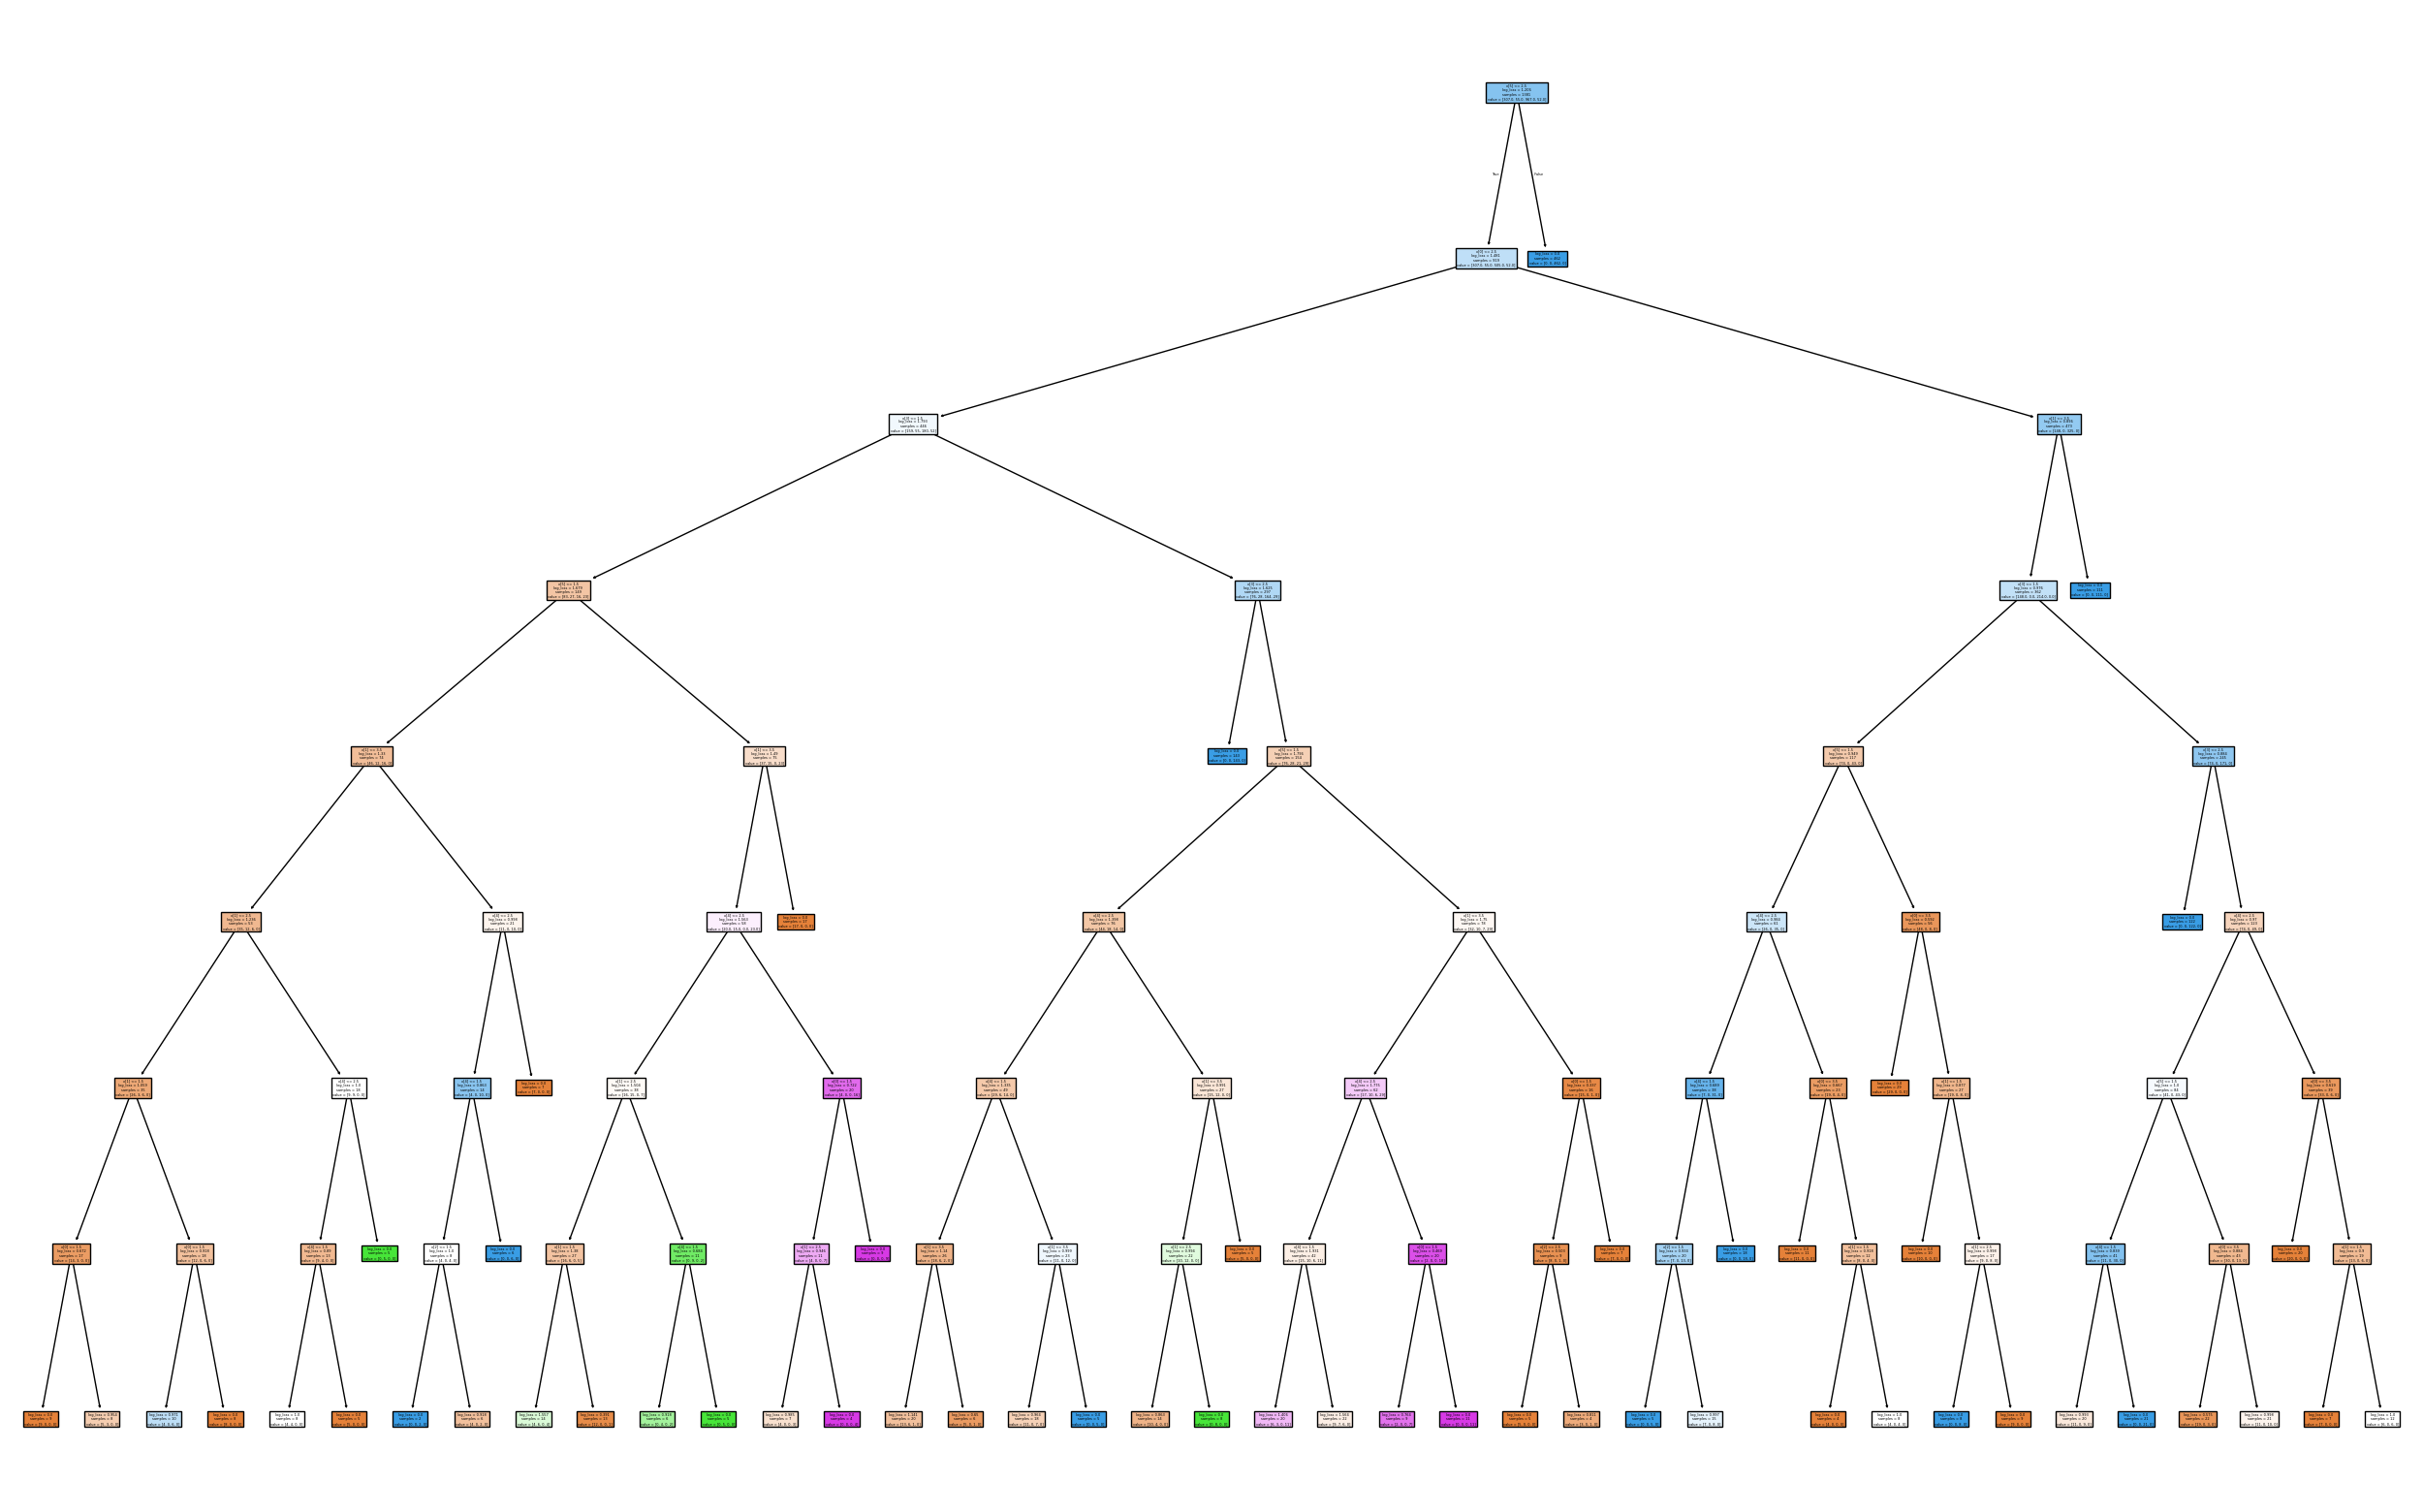

In [123]:
plt.figure(figsize=(32, 20))
tree.plot_tree(grid.best_estimator_, filled=True)

In [126]:
#classification only
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 68   2   5   2]
 [  8   6   0   0]
 [  6   0 236   0]
 [  2   2   0   9]]

Classification Report:
               precision    recall  f1-score   support

         acc       0.81      0.88      0.84        77
        good       0.60      0.43      0.50        14
       unacc       0.98      0.98      0.98       242
       vgood       0.82      0.69      0.75        13

    accuracy                           0.92       346
   macro avg       0.80      0.74      0.77       346
weighted avg       0.92      0.92      0.92       346


Accuracy: 0.9219653179190751
